In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler.columns = ["cinsiyet","koken","aile_egitim_seviyesi","ogle_yemegi",
                     "hazirlik_kursu","mat_notu","okuma_notu","yazma_notu"]

# 1. Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

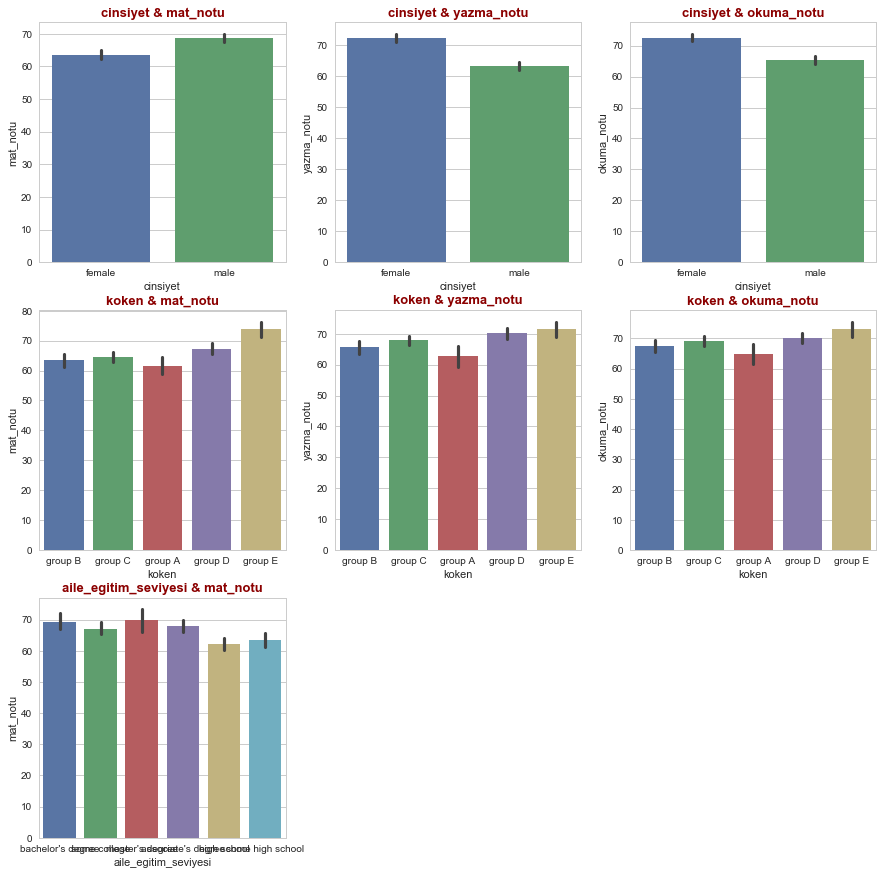

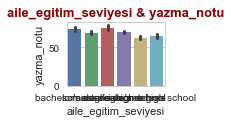

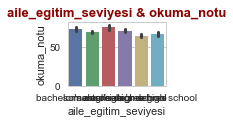

In [3]:
plt.figure(figsize=(15,15))

baslik_font = {'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font = {'family':'arial','color':'darkblue','weight':'bold','size':10}

x_degiskenler = ["cinsiyet","koken","aile_egitim_seviyesi"]
y_degiskenler = ["mat_notu","yazma_notu","okuma_notu"]


for i in range (3):
    plt.subplot(3,3,i+1)
    sns.barplot(ogrenciler[x_degiskenler[0]],ogrenciler[y_degiskenler[i]])
    plt.title(x_degiskenler[0] +" & " +y_degiskenler[i] ,fontdict=baslik_font)   
for i in range (3):        
    plt.subplot(3,3,i+4)
    sns.barplot(ogrenciler[x_degiskenler[1]],ogrenciler[y_degiskenler[i]])
    plt.title(x_degiskenler[1] +" & " +y_degiskenler[i] ,fontdict=baslik_font)    
for i in range (3):
    plt.subplot(3,3,i+7)
    sns.barplot(ogrenciler[x_degiskenler[2]],ogrenciler[y_degiskenler[i]])
    plt.title(x_degiskenler[2] +" & " +y_degiskenler[i] ,fontdict=baslik_font)
    plt.show()

# 2. Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

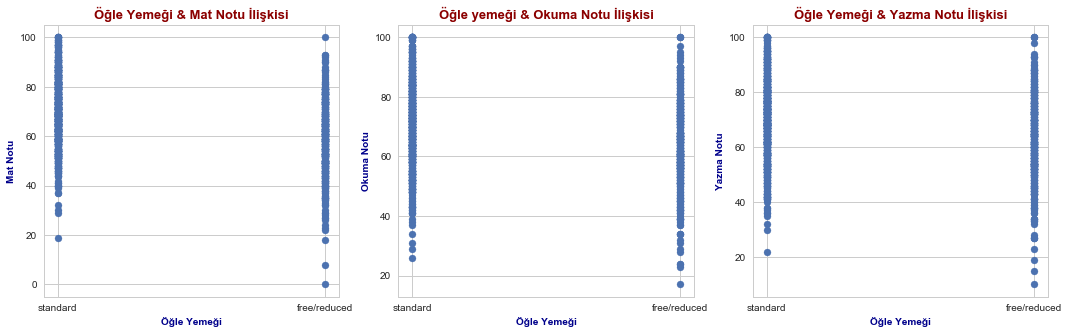

In [4]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(ogrenciler["ogle_yemegi"],ogrenciler["mat_notu"])
plt.title("Öğle Yemeği & Mat Notu İlişkisi",fontdict=baslik_font)
plt.xlabel("Öğle Yemeği",fontdict=eksen_font)
plt.ylabel("Mat Notu",fontdict=eksen_font)

plt.subplot(1,3,2)
plt.scatter(ogrenciler["ogle_yemegi"],ogrenciler["okuma_notu"])
plt.title("Öğle yemeği & Okuma Notu İlişkisi",fontdict=baslik_font)
plt.xlabel("Öğle Yemeği",fontdict=eksen_font)
plt.ylabel("Okuma Notu",fontdict=eksen_font)
    
plt.subplot(1,3,3)
plt.scatter(ogrenciler["ogle_yemegi"],ogrenciler["yazma_notu"])
plt.title("Öğle Yemeği & Yazma Notu İlişkisi",fontdict=baslik_font)
plt.xlabel("Öğle Yemeği",fontdict=eksen_font)
plt.ylabel("Yazma Notu",fontdict=eksen_font)

plt.show()

Grafiklerimizden de görüleceği üzere Öğle yemeği tipinin ,Sınav Performansı üzerinde etkisi yoktur.

# 3. Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

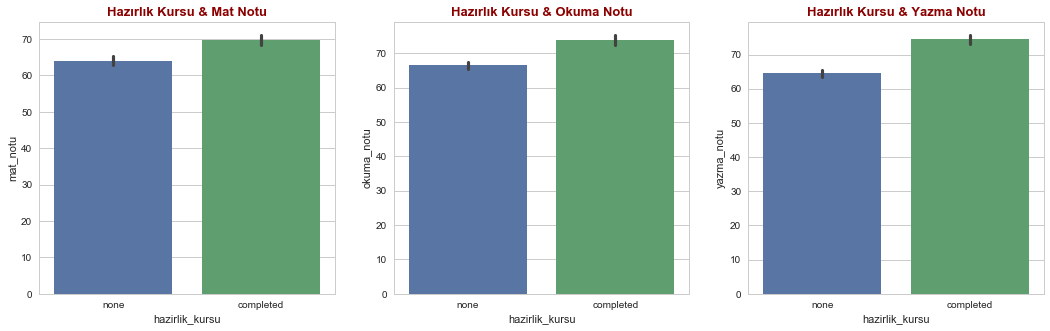

In [6]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["hazirlik_kursu"],ogrenciler["mat_notu"])
plt.title("Hazırlık Kursu & Mat Notu",fontdict=baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler["hazirlik_kursu"],ogrenciler["okuma_notu"])
plt.title("Hazırlık Kursu & Okuma Notu",fontdict=baslik_font)

plt.subplot(1,3,3)
sns.barplot(ogrenciler["hazirlik_kursu"],ogrenciler["yazma_notu"])
plt.title("Hazırlık Kursu & Yazma Notu",fontdict=baslik_font)

plt.show()

Görüleceği üzere hazırlık kursunu tamamlayanlarla(completed) ve almamış olanların(none) sınav performansları
(mat_notu,okuma_notu,yazma_notu)kıyaslandığında "completed" olanlar "none" olanlara nazaran daha başarılıdırlar

# 4.Birbiriyle korelasyonu en fazla olan dersler hangisidir?

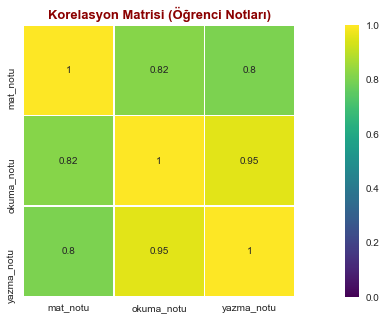

In [7]:
plt.figure(figsize=(18,5))
korelasyon_mat_ogrenciler = ogrenciler.corr()
sns.heatmap(korelasyon_mat_ogrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)", fontdict=baslik_font)

plt.show()

In [ ]:
Birbiriyle korelasyonu en iyi olan dersler "Korelasyon Matrisi(Öğrenci Notları)"tablosundan da görüleceği üzere ; 0.95 
ile yazma_notu-okuma_notu ,sonrasında 0.82 ile okuma_notu-mat_notu ,en sonunda ise 0.8 ile yazma_notu-mat_notu 
gelecektir.